# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats
import math
from math import e

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

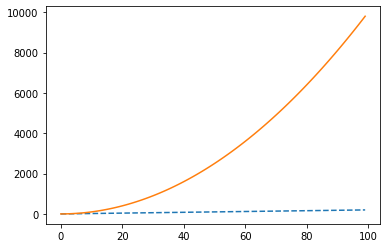

In [5]:
# Method 1
plt.plot(x,y, '--')
plt.plot(x,z, '-')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

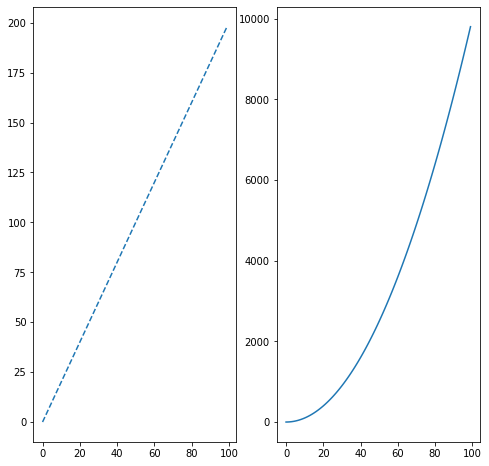

In [6]:
# Method 2
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,8) )
ax[0].plot(y,'--')
ax[1].plot(z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

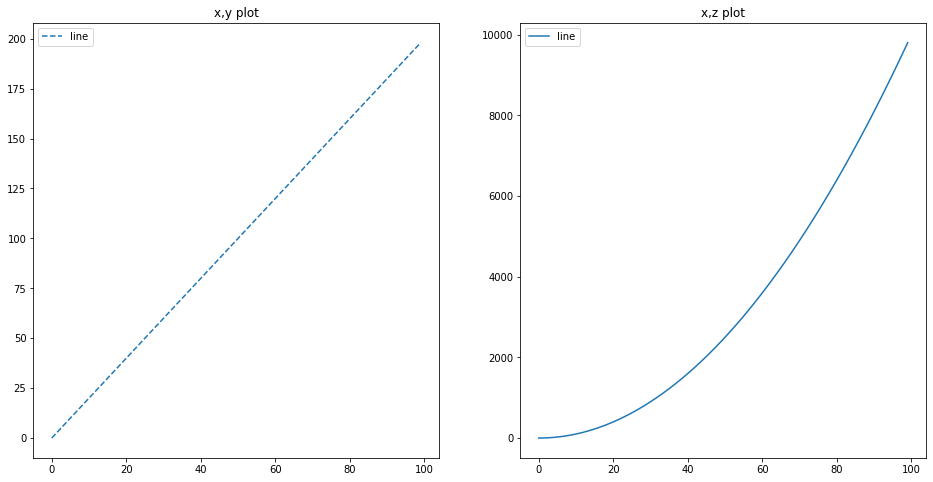

In [7]:
# your code here
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,8) )
ax[0].plot(y,'--', label = 'line')
ax[0].set_title('x,y plot')
ax[0].legend()
ax[1].plot(z, label = 'line')
ax[1].set_title('x,z plot')
ax[1].legend()


#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

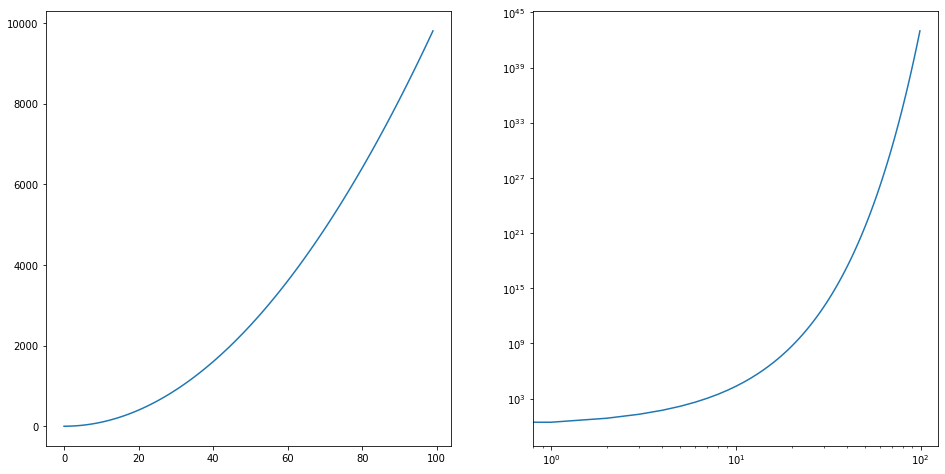

In [8]:
# your code here
y = x**2
z = e**x
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,8) )
ax[0].plot(y)
ax[1].plot(z)
ax[1].set_yscale('log')
ax[1].set_xscale('log')

#### As a bonus challenge, try to add a legend to the plot.

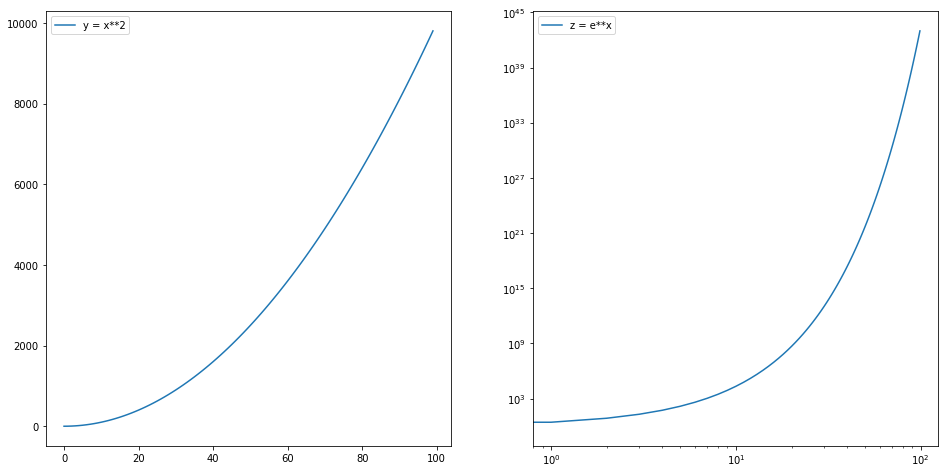

In [9]:
# your code here
y = x**2
z = e**x
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,8) )
ax[0].plot(y, label = 'y = x**2')
ax[0].legend()
ax[1].plot(z, label = 'z = e**x')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [10]:
# your code here
fitbit = pd.read_csv('./fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

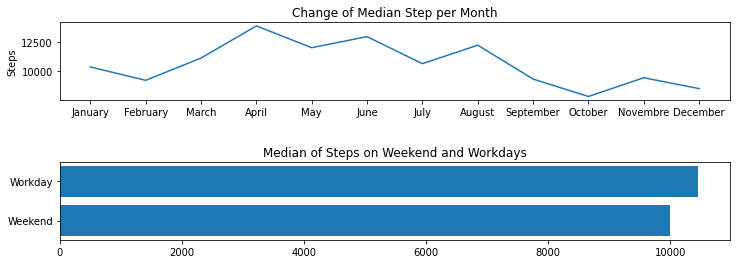

In [11]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
fitbit_month = fitbit[['Steps','Months_encoded']]
fitbit_month_1 = fitbit_month.groupby('Months_encoded').median() 
fitbit_month_average = fitbit_month_1.stack().reset_index()

a = fitbit_month_average['Months_encoded']
b = fitbit_month_average[0]

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
fitbit_work_or_weekend = fitbit[['Steps','Work_or_Weekend']]
fitbit_work_or_weekend_1 = fitbit_work_or_weekend.groupby('Work_or_Weekend').median() 
fitbit_work_or_weekend_average = fitbit_work_or_weekend_1.stack().reset_index()


c = fitbit_work_or_weekend_average['Work_or_Weekend']
d = fitbit_work_or_weekend_average[0]

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 4))
ax[0].plot(a,b)
ax[0].set_title('Change of Median Step per Month')
plt.sca(ax[0])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["January","February","March","April","May","June","July","August","September","October","Novembre","December"])
ax[0].set_ylabel('Steps');

plt.sca(ax[1])
ax[1].barh(c,d)
plt.yticks([0, 1,], ["Weekend", "Workday"])
ax[1].set_title('Median of Steps on Weekend and Workdays')
plt.subplots_adjust(hspace=0.8)
plt.show()

fig.savefig('./figures.pdf', 
            transparent=False, 
            dpi=80)


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

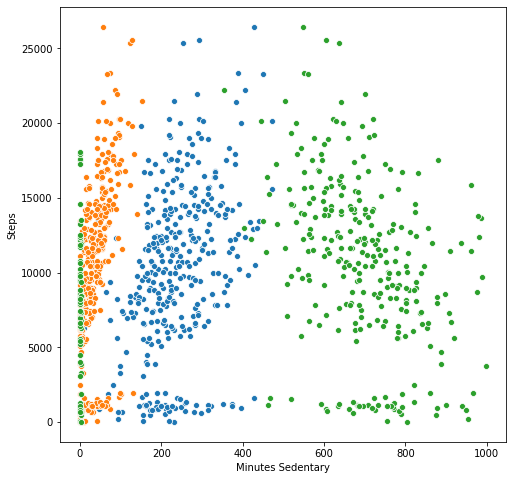

In [12]:
# your code here
fitbit_loop = fitbit[['Steps','Minutes Lightly Active','Minutes Very Active', 'Minutes Sedentary']]
S = fitbit_loop['Steps']
L = fitbit_loop['Minutes Lightly Active']
V = fitbit_loop['Minutes Very Active']
Se = fitbit_loop['Minutes Sedentary']
fig = plt.figure(figsize=(8, 8))
ax1 = sns.scatterplot(L,S)
ax2 = sns.scatterplot(V,S)
ax3 = sns.scatterplot(Se,S)


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [13]:
# your code here
titanic = pd.read_csv('./titanic.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [15]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [16]:
# NUMERICAL VARIABLES
# your code here
titanic_numeric = titanic.select_dtypes(exclude ='object') 

In [17]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include = 'object')


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [18]:
# your code here
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

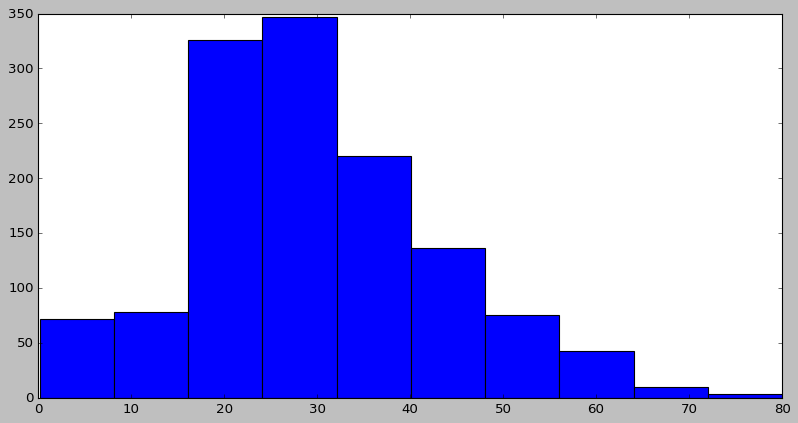

In [19]:
# your code here
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
ax.hist(titanic['Age']);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <a list of 50 Patch objects>)

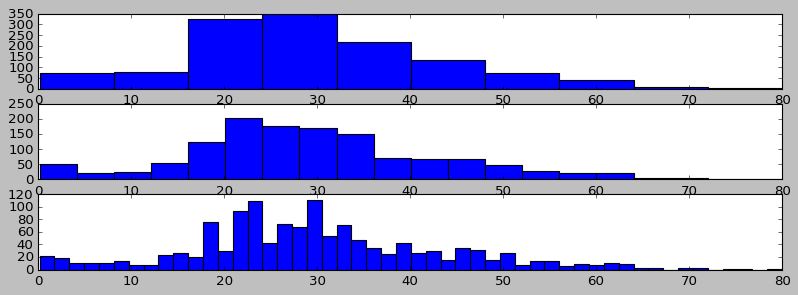

In [20]:
# your code here
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(12, 4))
ax[0].hist(titanic['Age'], bins = 10)
ax[1].hist(titanic['Age'], bins = 20)
ax[2].hist(titanic['Age'], bins = 50)

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
the information are more detailed if the bin size is bigger. However it is easier to get the rough picture of the distribution if the bin size is not too big.
"""

#### Use seaborn to show the distribution of column `Age`.

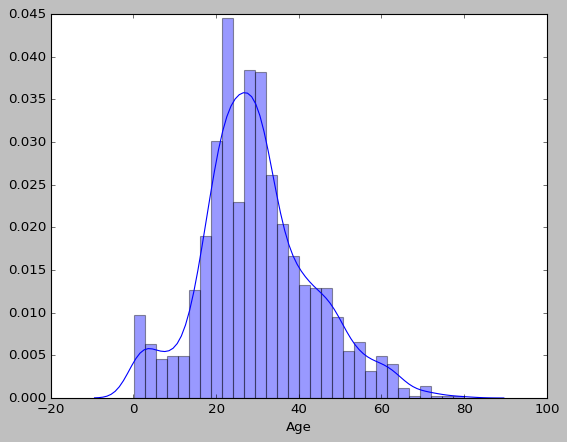

In [21]:
# your code here
x = titanic['Age']
sns.distplot(x)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

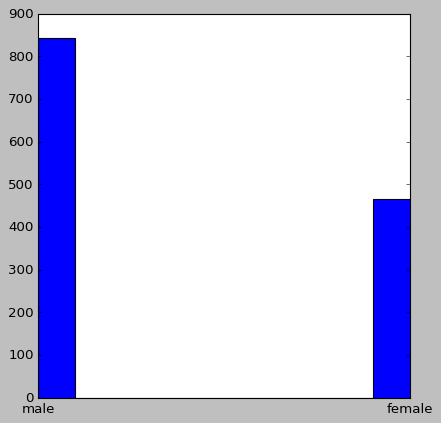

In [22]:
# Method 1 - matplotlib
# your code here
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.hist(titanic['Gender']);

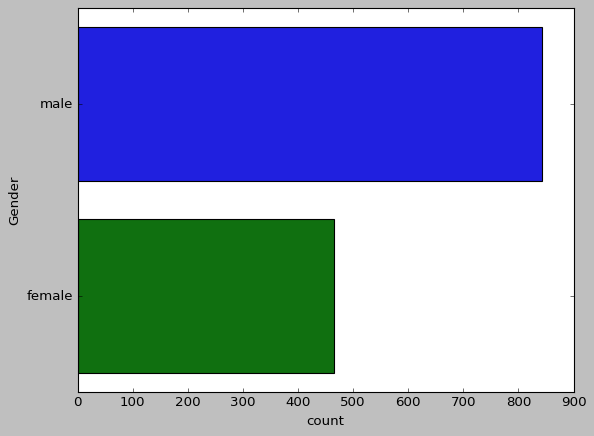

In [23]:
# Method 2 - seaborn
# your code here
sns.countplot(y="Gender", data=titanic);

#### Use the right plot to visualize the column `Pclass`.

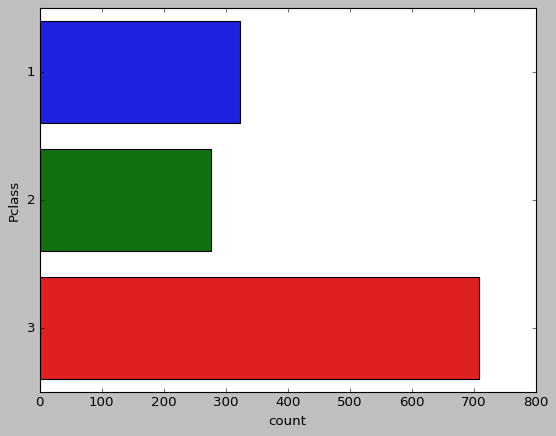

In [24]:
# your code here
sns.countplot( y = 'Pclass', data = titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

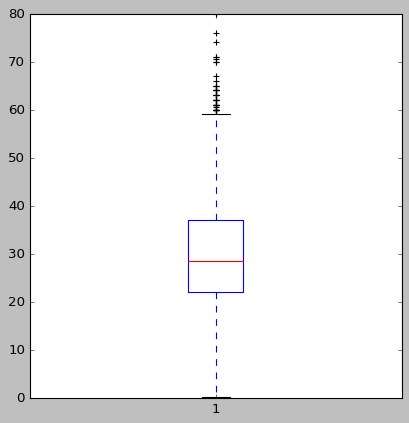

In [25]:
# your code here
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.boxplot(titanic['Age']);


In [ ]:
"""
your comments here
I would choose a box plot, which is a five number summary. It shows the minimum, first quartile, median and maximum.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
25% of the passengers are between 0 and about 22 years. 50 % are between 22 and 38 years and 25% are between 38 and about 59 years. There are some outlines,
The youngest passenger is yero years and the oldest 80 years. The median age is about 28.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

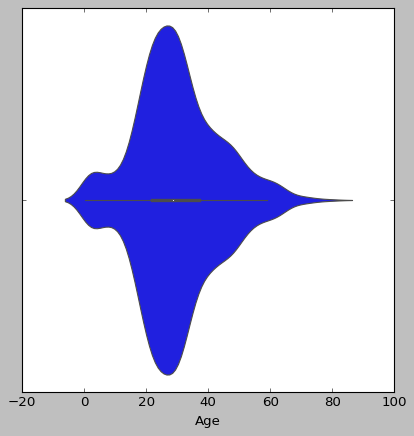

In [26]:
# your code here
fig = plt.figure(figsize=(6, 6))
ax = sns.violinplot(titanic['Age']);

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
with the violine plot you can see a more detailed distribution. E.g. that most of the passengers are at the age of around 23.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

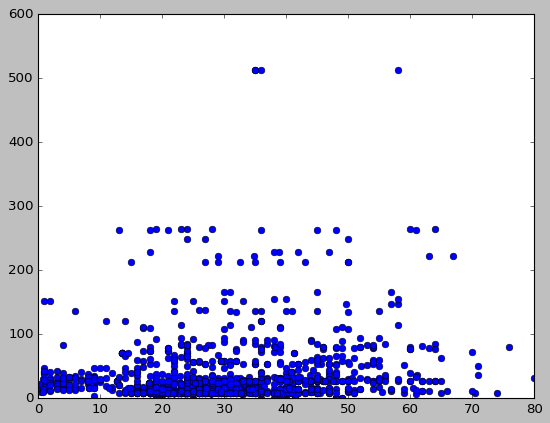

In [27]:
# Method 1 - matplotlib
# your code here
x = titanic['Age']
y= titanic['Fare']
plt.plot(x,y, 'o')

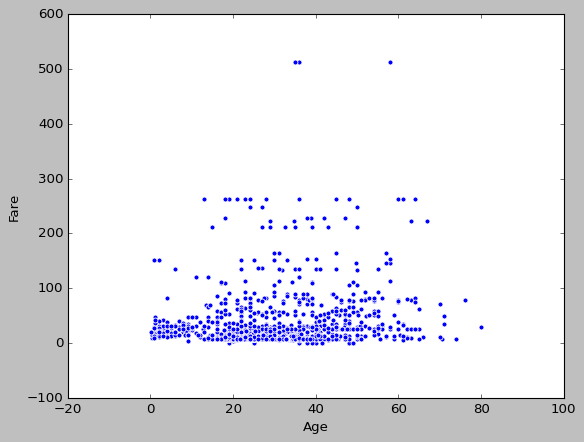

In [28]:
# Method 2 - seaborn
# your code here
sns.scatterplot( data = titanic, x =x, y =y)

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here


#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here